#Tarea metodos computacionales

Fecha de entrega: Viernes 18 de Octubre







# 1. Movimiento de proyectiles en presencia de viento.

Supongamos que un proyectil es lanzado desde el origen con una rapidez $v=vo( \cos \theta , \sin \theta) $. Supongamos además que el efecto del viento sobre el proyectil es el de una fuerza proporcional a la velocidad relativa entre el viento y el proyectil. Teniendo presente que si $u$ es la velocidad del viento y $\alpha$ el ángulo que hace dirección de esta velocidad con el eje x, se puede entrontrar las siguientes ecuaciones diferenciales, asociada al estado de movimiento del [proyectil](https://iopscience.iop.org/article/10.1088/0143-0807/36/2/025016/meta):


\begin{equation}
m\frac{dv_x}{dt} = -mb(v_x-u\cos \alpha )
\end{equation}

\begin{equation}
m\frac{dv_y}{dt} = -mg-mb(v_x-u\sin \alpha ),
\end{equation}

donde b es el párametro de rozamiento. La soluciones a las ecuaciones anteriores vienen dadas por:

Posición en x
\begin{equation}
x=(u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-\mathrm{exp}(-bt))
\end{equation}

Posicion en y 
\begin{equation}
y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}

Ver imagen:  http://www.sc.ehu.es/sbweb/fisica3/fluidos/viento/parabolico.html


0. Establezca las siguietnes condiciones inciales.

```
#Parametros iniciales

v0 = 60 #Velocidad en m/s
alpha = np.pi #Angulo del viento
theta = np.deg2rad(45) #Angulo de lanzamiento
u = v0/2             #rapidez del viento
b = 0.05             #Parametro de friccion 
g = 9.8                #Aceleracion de la gravedad m/s2

Params = (alpha, v0, b, u,g)  #Parametros en tupla.

```



1. Defina dos funciones, una para x y otra para y. 

```

#Posicion en x
def pos_x(t, theta, alpha, v0, b, u,g):
  x = #escriba aca la expresión
  return x

#Posicion en y
def pos_y(t, theta, alpha, v0, b, u,g):


  y = #escriba aca la expresión
  return y 

```

2. Construya un diccionario con las claves "X", "Y", "Tiempo"

3. Con el diccionario construya un data frame de pandas llamado df con los nombres de columnas "X", "Y", "Tiempo"  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html. Defina 1000 registros para el intervalo de tiempo elegido.


4. Realice un gráfico de x como función del tiempo, de y como función del tiempo y la trayectoria de la partícula (df["X"], df["tiempo"], df["Y"]).


5. Determine el alcance máximo de la partícula, para ello tome  la solucion teórica con $y=0$, solucione numéricamente la ecuación para t y remplace este valor en la ecuación para x. Resuelvalo para $\theta=45^{o}$.  

6. Construya una  grafica del alcance máximo R como función de $\theta$, varie $\theta$  entre 10 y 90 grados cada 5 grados.

7. Realice una interpolacion de R como función de theta.









In [132]:
import numpy as np
import matplotlib.pyplot as plt

# Parametros iniciales
v0 = 60 #Velocidad en m/s
alpha = np.pi #Angulo del viento
theta = np.deg2rad(45) #Angulo de lanzamiento
u = v0/2             #rapidez del viento
b = 0.05             #Parametro de friccion 
g = 9.8              #Aceleracion de la gravedad m/s2


In [166]:
pos_x=lambda t,theta: (u*np.cos(alpha))*t+(v0*np.cos(theta)-u*np.cos(alpha))*(1-np.exp(-b*t))/b
pos_y=lambda t,theta: (g/b+v0*np.sin(theta)-u*np.sin(alpha))*(1-np.exp(-b*t))/b-(g/b -u*np.sin(alpha))*t
t=np.linspace(0,8.2,100)

In [167]:
import pandas as pd 
df=pd.DataFrame({"Tiempo":t, "x":pos_x(t,theta),"y":pos_y(t,theta)})

In [168]:
print(df)

      Tiempo           x          y
0   0.000000    0.000000   0.000000
1   0.082828    3.501701   3.473270
2   0.165657    6.978661   6.865091
3   0.248485   10.430982  10.175799
4   0.331313   13.858765  13.405732
..       ...         ...        ...
95  7.868687  235.094005   8.769736
96  7.951515  236.648495   5.832821
97  8.034343  238.186291   2.840950
98  8.117172  239.707462  -0.205650
99  8.200000  241.212077  -3.306754

[100 rows x 3 columns]


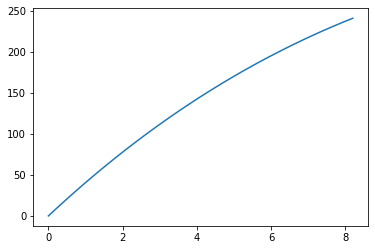

In [169]:
plt.plot(df["Tiempo"],df["x"])


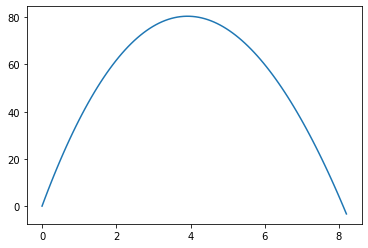

In [170]:
plt.plot(df["Tiempo"],df["y"])


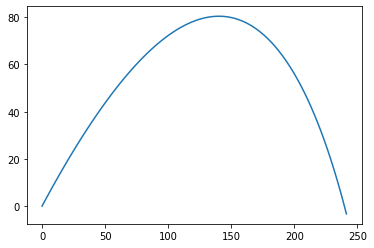

In [171]:
plt.plot(df["x"],df["y"])

In [180]:
t=np.linspace(0,8.2,10)
df=pd.DataFrame({"Tiempo":t, "x":pos_x(t,theta),"y":pos_y(t,theta)})
from scipy.interpolate import lagrange
y0=lagrange(df["Tiempo"],df["y"])
print(y0.roots)

[-53.74069224+106.2219776j  -53.74069224-106.2219776j
 114.11255267  +0.j          85.19775701 +74.25287661j
  85.19775701 -74.25287661j  16.39853522+109.1041377j
  16.39853522-109.1041377j    8.11162702  +0.j
   0.          +0.j        ]


In [161]:
#Para hallar el mayor alcance usamos la solución real que es 8.11 y la calculamos en x
pos_x(8.11,theta)


239.57640647818639




# 2.0  Interpolación lagrange

Consideremos la función: 
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

 1. Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$. 
 2. Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de sympy y encuente el error en la interpolación.
 
 Para este numeral, emplee que: 
 
 
La cota del  error , viene dado por: 
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation}, emplee la libreria simbolica para realizar la estimación de dicha cuota, sólo para n = 4, en el punto 0.5

-50*x/(25*x**2 + 1)**2
-50*x/(25*x**2 + 1)**2
50*(100*x**2/(25*x**2 + 1) - 1)/(25*x**2 + 1)**2
15000*x*(-50*x**2/(25*x**2 + 1) + 1)/(25*x**2 + 1)**3
15000*(10000*x**4/(25*x**2 + 1)**2 - 300*x**2/(25*x**2 + 1) + 1)/(25*x**2 + 1)**3
3750000*x*(-10000*x**4/(25*x**2 + 1)**2 + 400*x**2/(25*x**2 + 1) - 3)/(25*x**2 + 1)**4


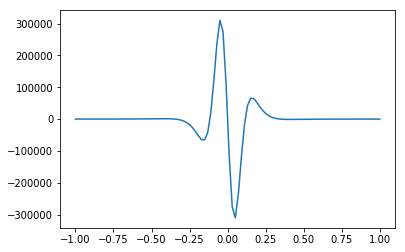

In [ ]:
#Ayuda: 

import sympy as sp # Cargamos sympy como sp
import numpy as np
import matplotlib.pylab as plt

f_s = lambda x: 1/(1+25*x**2)
sp.init_printing() # Usar LaTeX para dibujar ecuaciones

x = sp.symbols("x") # x será una variable simbólica
f_s(x)
print(sp.diff(f_s(x),x))
print(sp.diff(f_s(x),x, 1))
print(sp.diff(f_s(x),x, 2))
print(sp.diff(f_s(x),x, 3))
print(sp.diff(f_s(x),x, 4))
print(sp.diff(f_s(x),x, 5))
f5 = sp.diff(f_s(x),x, 5)
fxn5 = sp.lambdify(x,f5,'numpy') #numpy funcion

x_ = np.linspace(-1, 1, 100)

plt.figure()
plt.plot(x_, fxn5(x_) )
plt.show()


#3.  Interpolación Hermite

Consideremos la función: 
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

 1. Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$. 
 2. Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de sympy y encuente el error en la interpolación.
 
 Para este numeral, emplee que: 
 
 
La cota del  error , viene dado por: 

$$
  f(x)-p_{2n+1}(x)
  = \frac{f^{2n+2}(\xi)}{(2n+2)!} (x-x_0)^2(x-x_1)^2(x-x_2)^2,
$$





emplee la libreria simbolica para realizar la estimación de dicha cuota, sólo para n = 4, en el punto 0.5


/usr/local/lib/python3.7/dist-packages/numpy/polynomial/hermite.py:1391: RankWarning: The fit may be poorly conditioned
  return pu._fit(hermvander, x, y, deg, rcond, full, w)


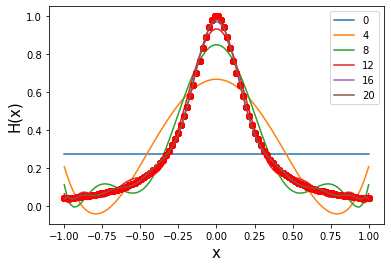

In [252]:
fx=lambda x: 1/(1+25*x**2)
x=np.linspace(-1,1,100)

for i in range(0,21,4):
  H=np.polynomial.hermite.Hermite.fit(x,fx(x),i)
  plt.plot(x,fx(x),'ro')
  plt.plot(x,H(x),label=i)
  plt.legend()
  plt.grid()
  plt.xlabel('x',size=15)
  plt.ylabel('H(x)',size=15)


Cota de error

15000*(10000*x**4/(25*x**2 + 1)**2 - 300*x**2/(25*x**2 + 1) + 1)/(25*x**2 + 1)**3


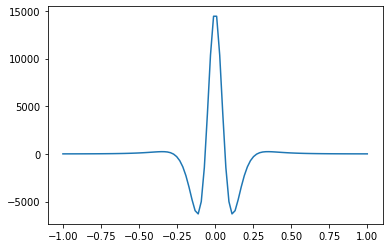

In [265]:
import sympy as sp
sp.init_printing() # Usar LaTeX para dibujar ecuaciones

x = sp.symbols("x") # x será una variable simbólica
print(sp.diff(fx(x),x, 4))
f5 = sp.diff(fx(x),x, 4)
fxn5 = sp.lambdify(x,f5,'numpy') #numpy funcion
x_ = np.linspace(-1, 1, 100)
plt.figure()
plt.plot(x_, fxn5(x_) )
plt.show()

# 4. Spline Cúbico

Consideremos la imagen ![paloma](https://github.com/hernansalinas/Metodos_Computacionales_taller/blob/main/Asignaciones/Tareas/Enunciados_2021_02/figuras/Fig.png?raw=true).

Con los datos dados en la tabla:

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`) 

2. Definir una lista de puntos, $x_i$,$y_i$ de la paloma.

3. Representar el polinomio de interpolación de Lagrange en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`), 


5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

Ref: Metodos numericos, Burden.

In [181]:
im=plt.imread("pato1.png")

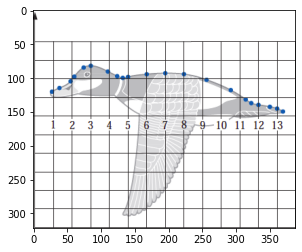

In [182]:
plt.imshow(im)

In [184]:
puntos=np.array([[25,39,54,58,73,84,108,121,133,139,169,196,220,254,293,314,320,333,350,359,370],
                [121,114,104,101,88,86,92,97,101,100,94,92,95,104,120,131,136,141,142,146,150]])

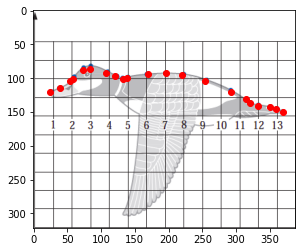

In [186]:
plt.imshow(im)
plt.plot(puntos[0],puntos[1],"ro")

In [198]:
poly=lagrange(puntos[0],puntos[1])

(320.0, 0.0)

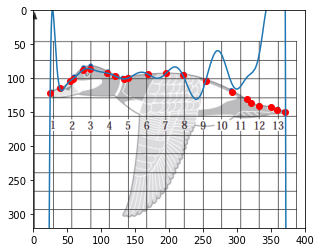

In [199]:
x=np.linspace(0,380,1000)
plt.imshow(im)
plt.plot(puntos[0],puntos[1],"ro")
plt.plot(x,poly(x),'-')
plt.xlim(0,400)
plt.ylim(320,0)


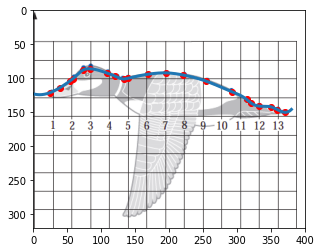

In [211]:
from scipy.interpolate import CubicSpline

cubic=CubicSpline(puntos[0],puntos[1])

x=np.linspace(0,380,1000)
plt.imshow(im)
plt.plot(puntos[0],puntos[1],"ro")
plt.plot(x,cubic(x),linewidth=3)
plt.xlim(0,400)
plt.ylim(320,0)


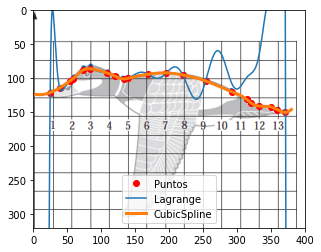

In [213]:
plt.imshow(im)
plt.plot(puntos[0],puntos[1],"ro",label='Puntos')
plt.plot(x,poly(x),'-',label='Lagrange')
plt.plot(x,cubic(x),linewidth=3,label='CubicSpline')
plt.legend()
plt.xlim(0,400)
plt.ylim(320,0)

La diferencia entre Lagrange y CubicSpline es que lagrange devuelve una interpolacion polinomica por los parametros dados, mientras que CubicSpline devuelve un polinomio cubico que coincida con los datos dados